# SMD Übungszettel Nr. 9

__Abgabe von: Pape, Kusurmann und Becker__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(8)

## Nr. 25

### Aufgabenteil a)


In [15]:
pd_a = pd.read_csv('./aufg_a.csv')

Es soll an ein Polynom sechsten Grades gefittet werden:
$$
P(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
$$
Stelle die Designmatrix auf:

In [51]:
def poly__6(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x +g

In [25]:
x__6 = pd_a['x'].values**6
x__5 = pd_a['x'].values**5
x__4 = pd_a['x'].values**4
x__3 = pd_a['x'].values**3
x__2 = pd_a['x'].values**2
x__1 = pd_a['x'].values
x__0 = pd_a['x'].values * 1/pd_a['x'].values

In [41]:
A = np.array([x__6, x__5, x__4, x__3, x__2, x__1, x__0]).T

Berchene die Koeffizienten

In [63]:
cof = np.linalg.inv(A.T @ A) @ A.T @ pd_a['y'].values

print(f'Die berechneten Koeffizienten lauten: \n {cof}')

Die berechneten Koeffizienten lauten: 
 [-1.96288194e-04  4.78568044e-03 -4.52007747e-02  2.10566519e-01
 -5.13748208e-01  6.09609032e-01 -6.74453234e-02]


Berechne die Fehler:

In [82]:
sigma = np.zeros((8, 8), int)
np.fill_diagonal(sigma, 1)
var = np.linalg.inv(A.T @ A) @ A.T @ sigma @ A @ np.linalg.inv(A.T @ A)

__Frage__

Wie werden die Parameterfehler berechnet, wenn der Fehler von $y$ nicht bekannt ist oder nicht verwendet wird? 
Wenn in Pyhton zum Beispiel die Funktion `curve_fit` (bekannt aus dem Toolbox Workshop) verwendet wird, gibt diese  einen Fehler bzw. eine Korrelationsmatrix aus, obwohl die Fehler der Datenpunkte nicht mit angegbene wurden. 

Dann wir die $\hat{S}$ Matrix verwendet.

x_fit = np.linspace(min(pd_a['x'].values-0.5), max(pd_a['x'].values)+0.5, 100)

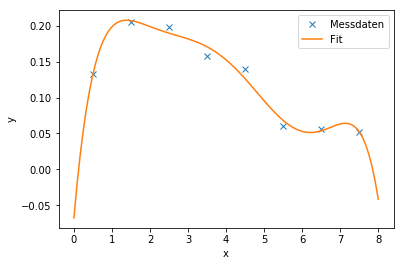

In [59]:
plt.plot(pd_a['x'].values, pd_a['y'].values,'x', label='Messdaten')
plt.plot(x_fit, poly__6(x_fit, *cof), label='Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Aufgabenteil b)

In [62]:
lambdar = [0.1, 0.3, 0.7, 3, 10]

In [86]:
def cof_reg(A, y, Gammar):
    return np.linalg.inv(A.T @ A + Gammar.T @ Gammar) @ A.T @ y

In [130]:
C  = np.zeros((8, 8))

In [135]:
np.fill_diagonal(C[1:], 1)
np.fill_diagonal(C[:, 1:], 1)
np.fill_diagonal(C, -2)
C[0,0] = -1
C[7, 7] = -1

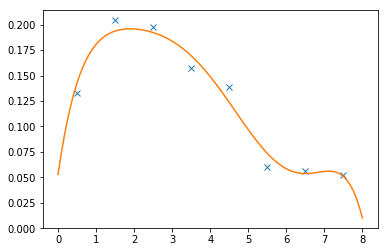

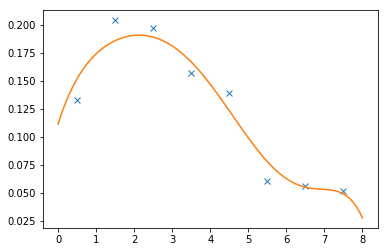

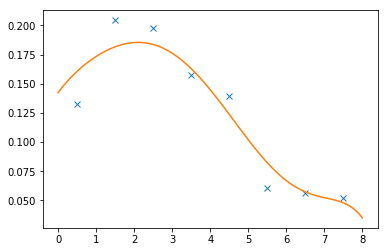

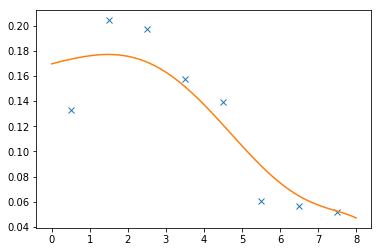

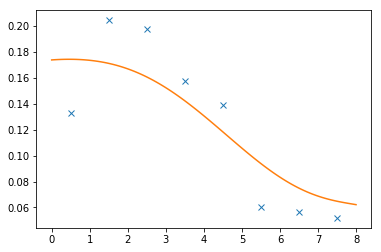

In [148]:
params = []

for lam in lambdar:
    Gammar = np.sqrt(lam) * C @ A
    
    para = cof_reg(A, pd_a['y'].values, Gammar)
    params.append(para)
    
    plt.plot(pd_a['x'].values, pd_a['y'].values,'x', label='Messdaten')
    plt.plot(x_fit, poly__6(x_fit, *para), label='Fit')
    plt.show()

### Aufgabenteil c)

In [178]:
pd_c = pd.read_csv('./aufg_c.csv')

In [179]:
labels = ['x',]
for i in range(0,50):
    labels.append('y_'+str(i))


In [180]:
pd_c = pd.DataFrame(pd_c.values, columns=labels)

In [222]:
W = np.zeros((8,8))

In [242]:
stds = np.ones(pd_c.shape[0])
means =  np.ones(pd_c.shape[0])
for i in range(pd_c.shape[0]):
    stds[i] = pd_c.ix[i][1:].std(axis=0)
    means[i] = pd_c.ix[i][1:].mean(axis=0)

np.fill_diagonal(W, stds)

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [250]:
params_c = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ means

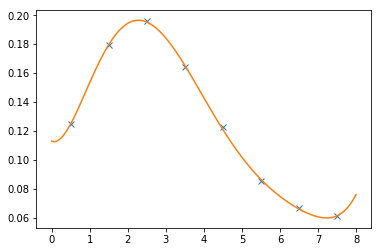

In [252]:
plt.plot(pd_a['x'].values, means,'x', label='Messdaten')
plt.plot(x_fit, poly__6(x_fit, *params_c), label='Fit')

## Nr. 26